# Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos

**Nombre:** Paola Sofia Reyes Mancheno

**Matrícula:** A00831314

### Librerías

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm

# _Exploración y preparación de la base de datos_

## **1. Exploración de la base de datos**

In [ ]:
df = pd.read_csv("precios_autos.csv")
df["symboling"] = df["symboling"].astype("category") #se especifica que es categorica para que no se confunda como numérica
df.head(4)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0


En total existen 21 columnas, las cuales se dividen entre variables cualitativas y cuantitativas, para facilidad en el análisis estadístico de estos dos tipos de variables, se dividirán en dos datasets dependiendo del tipo de variable.

In [ ]:
cuan = df.select_dtypes(np.number)
cual = df.select_dtypes(exclude = np.number)

### 1.1. Medidas estadísticas

#### Variables cuantitativas
(Media, desviación estándar, cuantiles)

Dentro de esta tabla, se encuentra toda la información estadística de las variables cuantitativas; como tal no se puede apreciar ninguna información, no obstante esta podrá ser apreciada mediante gráficas más adelante.

In [ ]:
cuan.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Variables cualitativas

A continuación, se aprecian las frecuencias para las categorías de cada una de las variables cualitativas. A simple vista, se puede observar que la variable CarName tiene 147 categorías distintas, por lo cual no aparecen sus frecuencias en totalidad. Por otro lado, existen variables como FuelType o EngineLocation, las cuales nada más tienen dos posibles valores, y en ambos casos una de las categorías conforma casi la totalidad de los datos.

In [ ]:
for i in cual.columns:
  print(df.groupby(i)[i].count(), "\n___________________________________")

symboling
-2     3
-1    22
0     67
1     54
2     32
3     27
Name: symboling, dtype: int64 
___________________________________
CarName
Nissan versa                1
alfa-romero Quadrifoglio    1
alfa-romero giulia          1
alfa-romero stelvio         1
audi 100 ls                 1
                           ..
volvo 246                   1
volvo 264gl                 2
volvo diesel                1
vw dasher                   1
vw rabbit                   1
Name: CarName, Length: 147, dtype: int64 
___________________________________
fueltype
diesel     20
gas       185
Name: fueltype, dtype: int64 
___________________________________
carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64 
___________________________________
drivewheel
4wd      9
fwd    120
rwd     76
Name: drivewheel, dtype: int64 
___________________________________
enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64

### 1.2. Herramientas de visualización

A continuación, se puede observar la información recabada en el inciso anterior de manera gráfica.

#### Variables cuantitativas

##### _Medidas de posición_
(cuartiles, outliers, boxplots)

A continuación, la gráfica contiene diagramas de caja sobre todas las variables cuantitativas del modelo. De manera general, se identifica que la mayoría de variables cuentan con datos atípicos, siendo la variable objetivo, _price_, la que cuenta con mayor cantidad de estos. Así también, es importante recalcar que el rango de valores es muy diferente entre las variables.

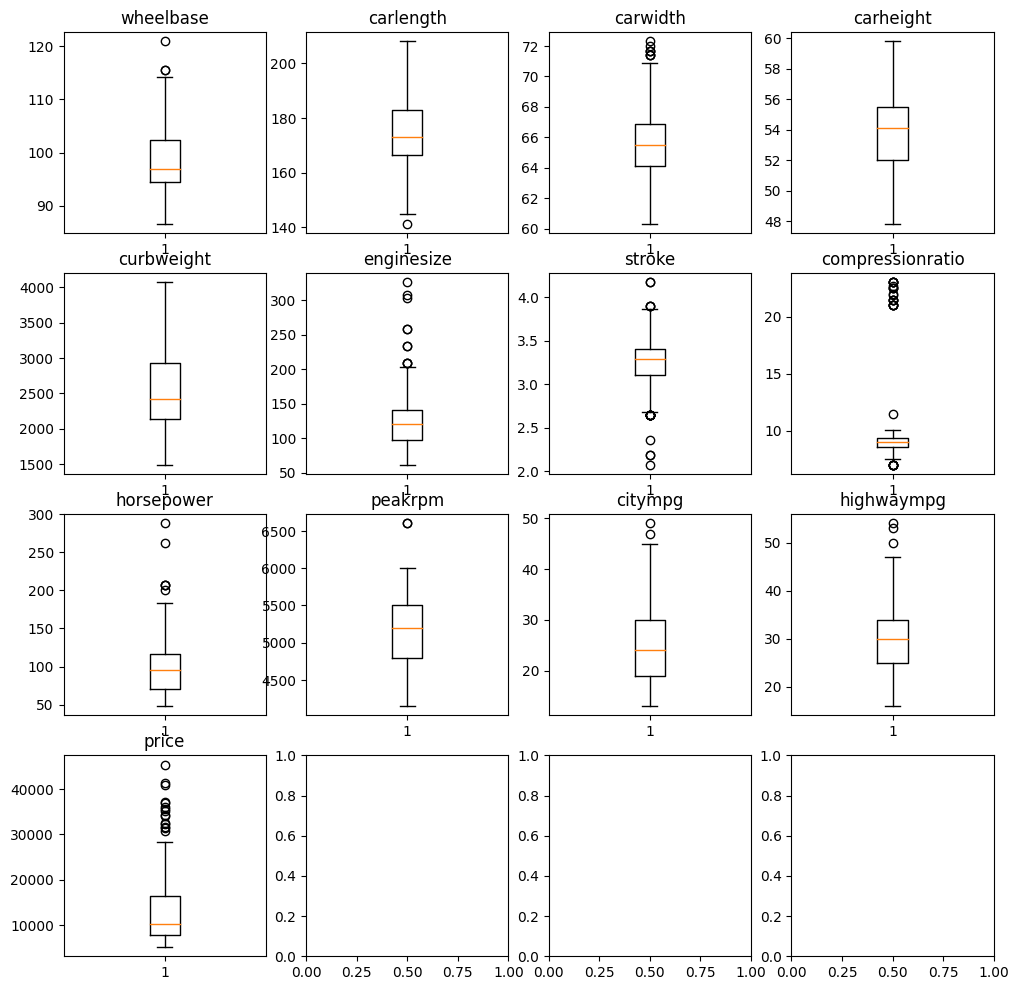

In [ ]:
figure, axis = plt.subplots(4, 4, figsize=(12, 12))

row = 0
col = 0
for i in cuan.columns:
  axis[row, col%4].boxplot(cuan[i])
  axis[row, col%4].set_title(i)

  col =col + 1
  if col%4 == 0: row = row + 1


##### _Análisis de distribución de los datos_


Ahora bien, para analizar de mejor manera la distribución de los datos cuantitativos, se hace el uso de histogramas. Para estas 13 variables, gráficamente las distribuciones están repartidas entre las siguientes: normal, sesgada a la derecha (la mayoría de las variables), e incluso exponencial. Esto significa que, posterior a la elección de variables, será importante trabajar en la normalización de los datos para una mejor calidad del modelo.

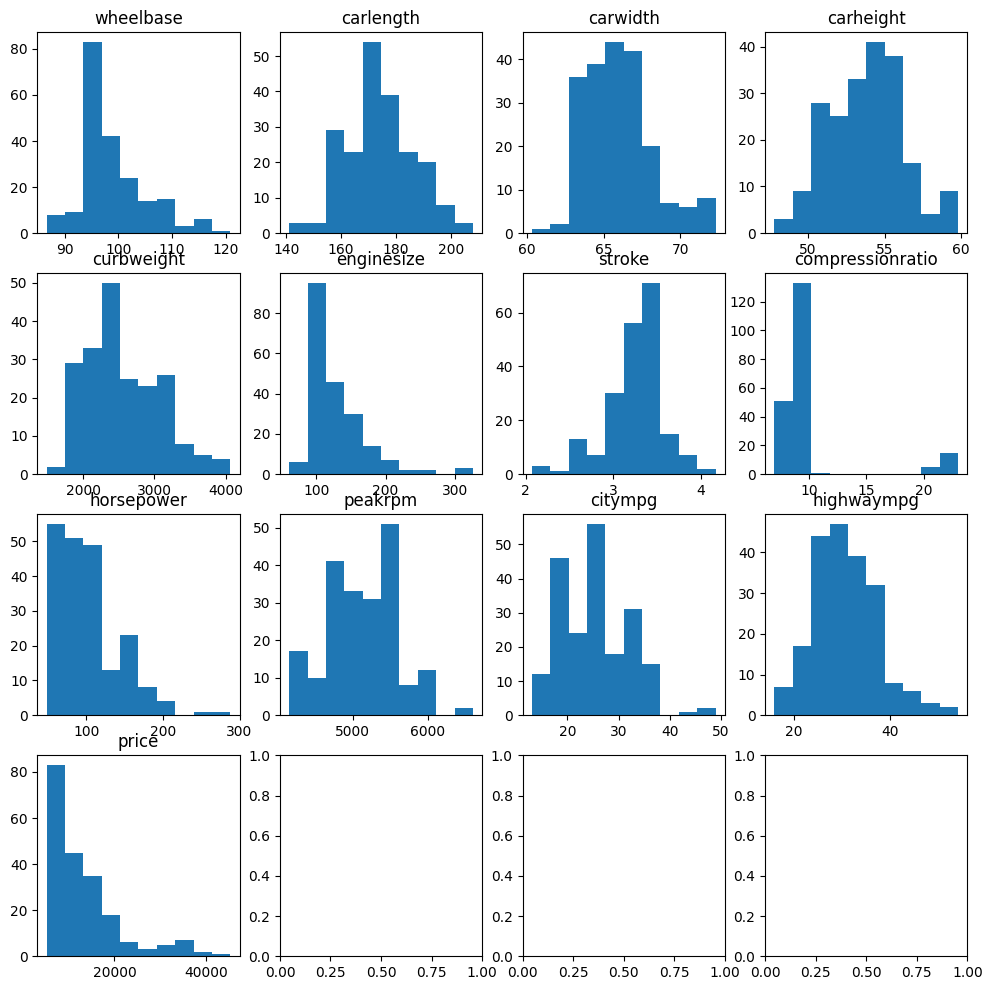

In [ ]:
figure, axis = plt.subplots(4, 4, figsize=(12, 12))

row = 0
col = 0
for i in cuan.columns:
  axis[row, col%4].hist(cuan[i])
  axis[row, col%4].set_title(i)

  col =col + 1
  if col%4 == 0: row = row + 1

##### _Colinealidad_
(Coeficiente de correlación, diagramas de dispersión)

La matriz de correlación de Pearson, permite observar que algunos pares de variables tienen gran correlación entre ellos, lo que nos da la posibilidad de identificar qué variables no deberían escogerse juntas para el modelo para evitar multicolinealidad. Algunas de ellas son, CityMPG con HighwayMPG (al tratarse ambas de las millas por galón), WheelBase con CarWidth,CarWeight con Curve Weight, etc.

Con respecto a la variable dependiente, esta tiene una correlación mayor al 0.5 con 6 variables, y correlación negativa significativa con CityMPG y HighwayMPG.

<Axes: >

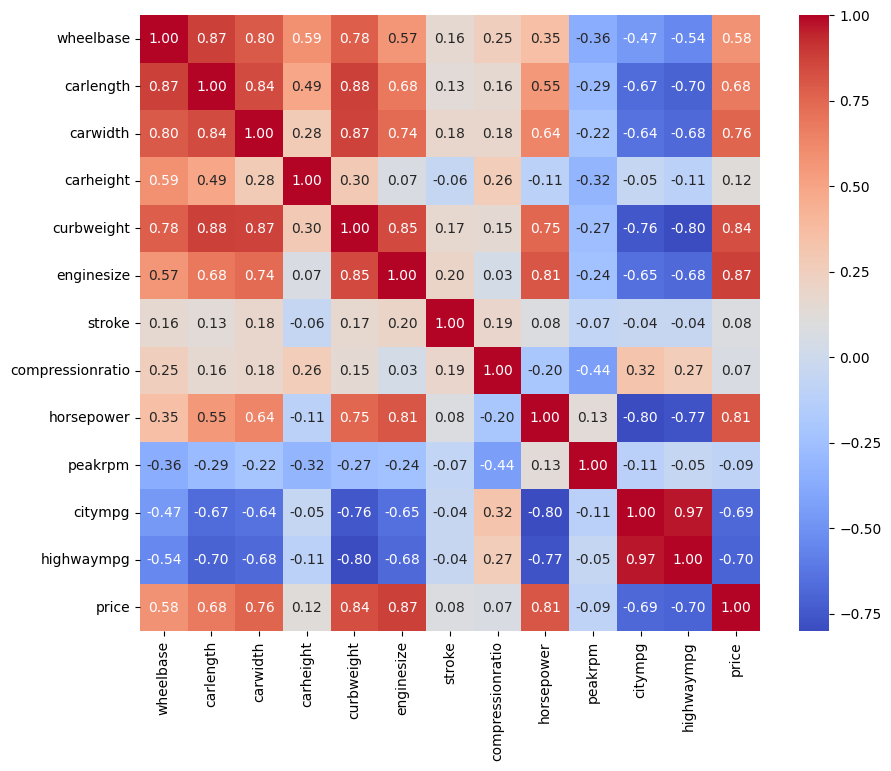

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cuan.corr(), cmap = "coolwarm", annot=True,fmt=".2f" )

El diagrama de dispersión muestra de forma gráfica la misma información brindada por la matriz de correlación.

In [ ]:
#cuan_sign =
fig = px.scatter_matrix(cuan.corr())
fig.update_traces(diagonal_visible = False)
fig.update_layout(dragmode='select',
                  width=1200,
                  height=1050,
                  hovermode='closest')
fig.show()

#### Variables categóricas

##### _Distribución de los datos_

Por parte de las variables cualitativas, la distribución de los datos no es cercano a uniforme en ninguna de estas. Tanto en FuelType, EngineLocation, EngineType y CilinderNumber, una de sus categorías reúne a la mayoría de los registros. No obstante, debido a que no existe una distribución uniforme en ninguna de las variables, todas ellas cuentan con heterocedasticidad, ya que no hay una completa representación de todas las categorías.

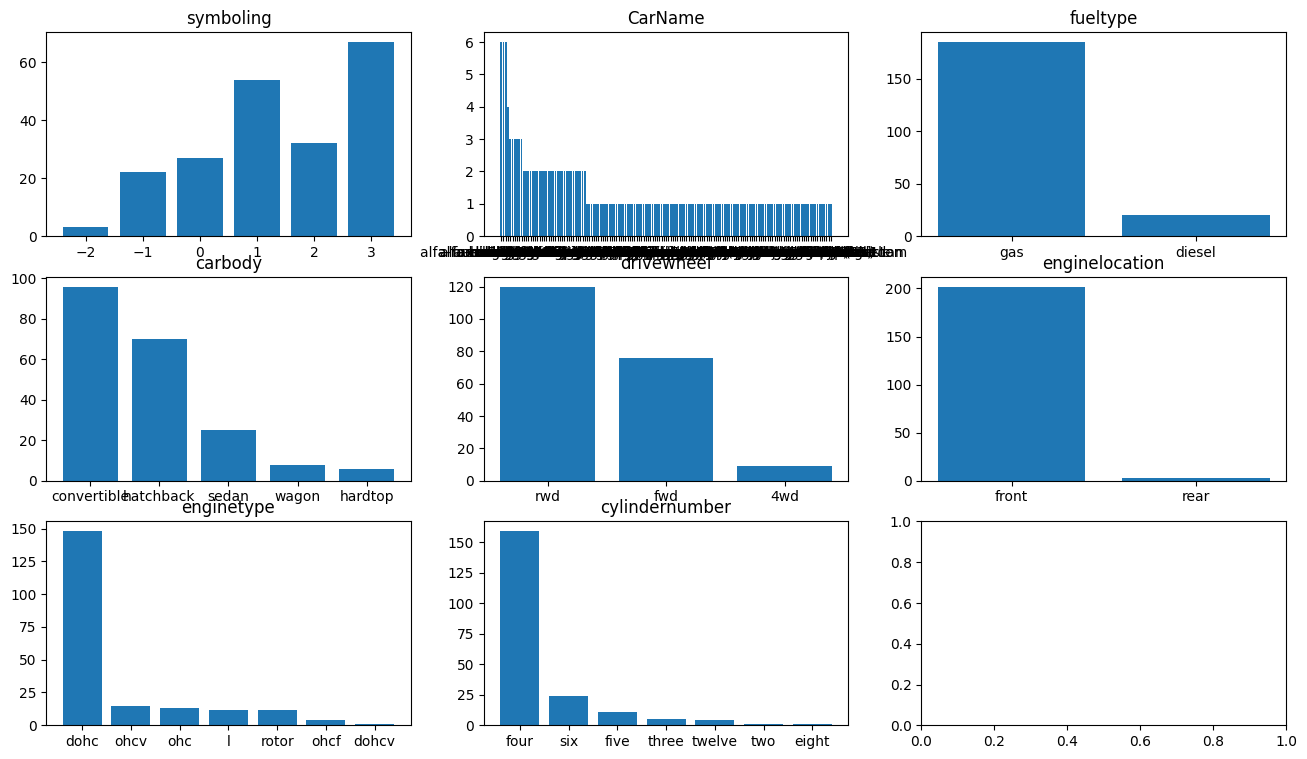

In [ ]:
figure, axis = plt.subplots(3, 3, figsize=(16, 9))

row = 0
col = 0
for i in cual.columns:
  axis[row, col%3].bar(cual[i].unique(), cual[i].value_counts())
  axis[row, col%3].set_title(i)

  col =col + 1
  if col%3 == 0: row = row + 1
#cual["symboling"].value_counts().plot(kind = "bar", sort_columns = True)

##### _Asociación o colinealidad_

En los siguientes gráficos se muestran las variables categóricas con relación al precio resaltando su mediana, cuartiles y outliers. En la mayoría de ellas se observa una gran diferencia en las medidas de dispersión de las categorías, por lo que los boxplots no abarcan el mismo rango de precios. Por ejemplo, en la variable de enginetype el tipo ohcv cubre precios desde 1300 hasta 4500 aproximadamente, mientras que el resto de tipos tiene un rango de valores más corto. La variable de fueltype es la única en donde los boxplots se comportan similarmente, pero aun así hay bastantes outliers en el primer tipo.

Text(0.5, 0.98, 'Precio por categorias')

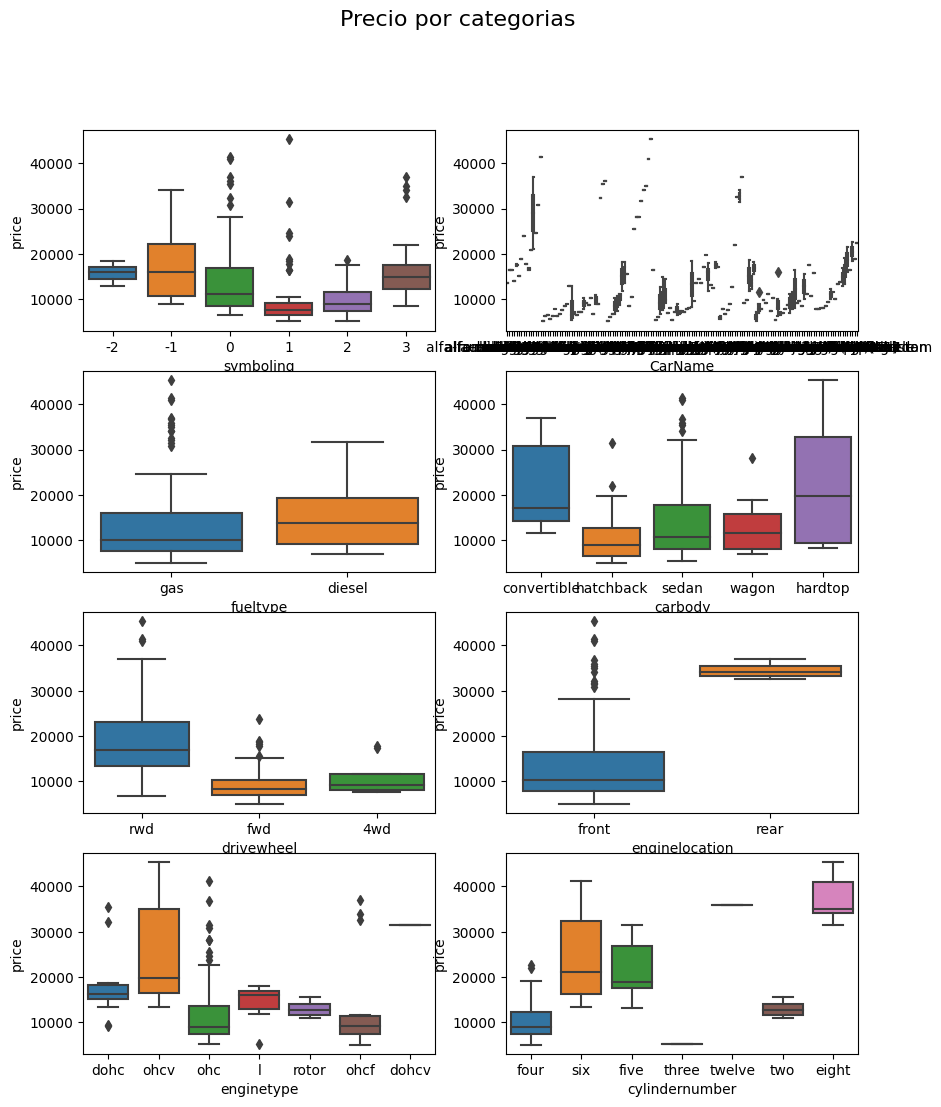

In [ ]:
figure, axis = plt.subplots(4, 2, figsize=(10, 12))

row = 0
col = 0
for i in cual.columns:
  sns.boxplot(ax=axis[row, col%2], data=df, x=i, y='price', )

  col =col + 1
  if col%2 == 0: row = row + 1

figure.suptitle ("Precio por categorias", fontsize = 16)

Text(0.5, 0.98, 'Precio por categorias')

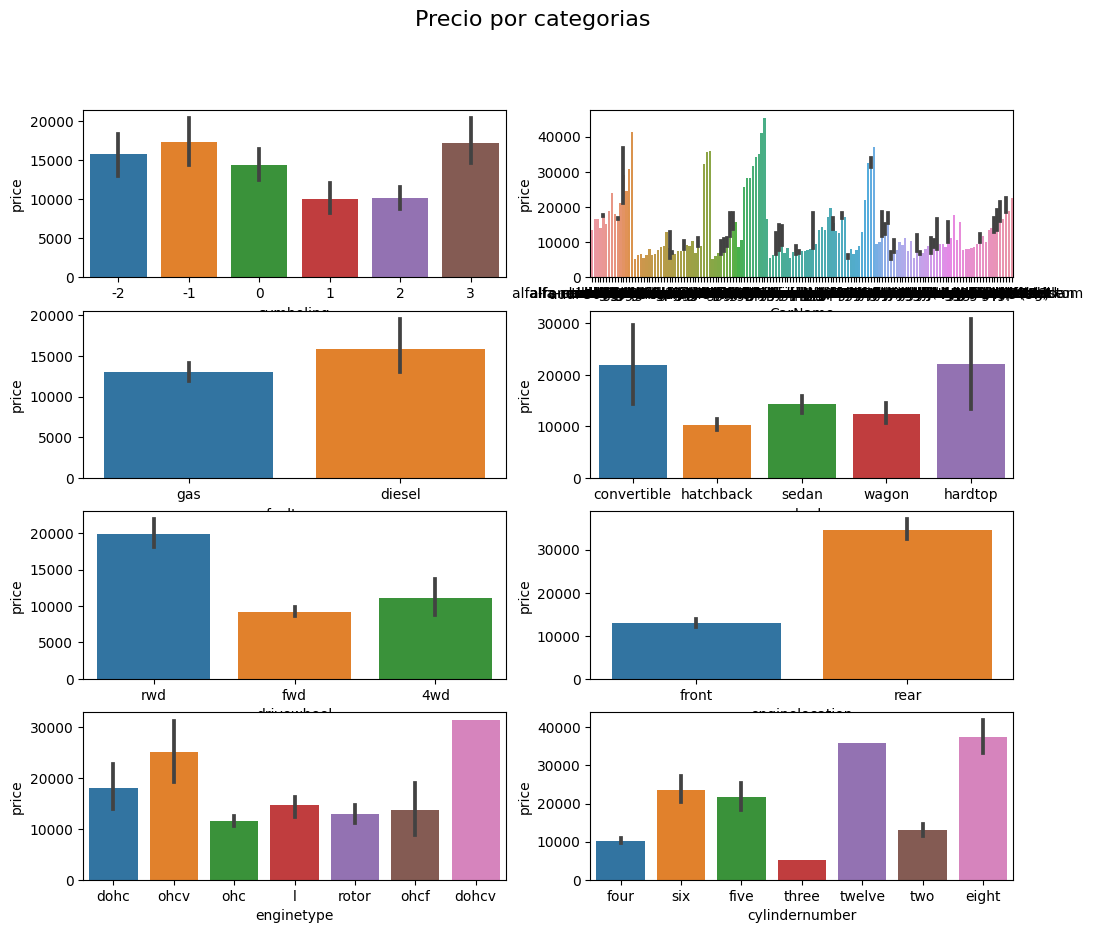

In [ ]:
figure, axis = plt.subplots(4, 2, figsize=(12, 10))

row = 0
col = 0
for i in cual.columns:
  sns.barplot(ax=axis[row, col%2], data=df, x=i, y='price', )

  col =col + 1
  if col%2 == 0: row = row + 1

figure.suptitle ("Precio por categorias", fontsize = 16)

### 1.3. Calidad de datos

#### _Valores faltantes_

Dentro de este set de datos no se encuentran valores faltantes en ninguna de las variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    category
 1   CarName           205 non-null    object  
 2   fueltype          205 non-null    object  
 3   carbody           205 non-null    object  
 4   drivewheel        205 non-null    object  
 5   enginelocation    205 non-null    object  
 6   wheelbase         205 non-null    float64 
 7   carlength         205 non-null    float64 
 8   carwidth          205 non-null    float64 
 9   carheight         205 non-null    float64 
 10  curbweight        205 non-null    int64   
 11  enginetype        205 non-null    object  
 12  cylindernumber    205 non-null    object  
 13  enginesize        205 non-null    int64   
 14  stroke            205 non-null    float64 
 15  compressionratio  205 non-null    float64 
 16  horsepower        205 non-

#### _Outliers_

Para realizar el cálculo de los outliers se calculó el rango intercuartil (IQR) para obtener la diferencia entre el tercer y primer cuartil. En los resultados se muestra que las variables de compressionratio, stroke, price y enginesize son las que tienen la mayor cantidad de outliers. Siendo CompressionRatio el que tiene más del 10% de sus datos como valoresa atípicos, sin embargo no se eliminarán dichos datos, porque esta variable no se utilizará posteriormente.

In [ ]:
Q1 = cuan.quantile(0.25)
Q3 = cuan.quantile(0.75)
IQR = Q3 - Q1


In [ ]:
((cuan < (Q1 - 1.5 * IQR)) | (cuan > (Q3 + 1.5 * IQR))).sum()/len(cuan)*100

wheelbase            1.463415
carlength            0.487805
carwidth             3.902439
carheight            0.000000
curbweight           0.000000
enginesize           4.878049
stroke               9.756098
compressionratio    13.658537
horsepower           2.926829
peakrpm              0.975610
citympg              0.975610
highwaympg           1.463415
price                7.317073
dtype: float64

### 1.4. Selección de variables

En total, se escogen 8 variables independientes (y 1 independiente, price), las cuales, posterior a la preparación de los datos, serán 7. Estas variables fueron escogidas según el siguiente criterio:
1. A través de conocimiento cultural y por medio de investigación se preseleccionaron las variables más populares al promocionar la venta de un carro, y lo que las personas suelen buscar.
2. Para las variables preseleccionadas numéricas, se analiza según la matriz de correlación con respecto a precio, y posteriormente se revisa el diagrama de caja para poder seleccionar las variables con menor cantidad de outliers.
3. En el caso de que las variables preseleccionadas son categóricas, se analizan los diagramas de caja del precio según estas variables y se seleccionaron las variables que mostraron diferencia de comportamiento dependiendo de las categorías.

In [ ]:
x = df[["symboling", "carbody", "enginetype", "wheelbase",
        "cylindernumber", "horsepower", "citympg", "highwaympg", "price"]]

## **2. Preparación de la base de datos**

### 2.1. Selección conjunto de datos

#### _Datos categóricos_
En este paso se realizó una transformacion de las variables categóricas a dummies.

**Car Body**

convertible = 0

hatchback = 1

sedan = 2

wagon = 3

hardtop = 4

In [ ]:
x.carbody.replace(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], [0,1,2,3,4], inplace = True)

<ipython-input-17-f42ab79a2210>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Engine Type**

dohc = 0

ohcv = 1

ohc = 2

l = 3

rotor = 4

ohcf = 5

dohcv = 6

In [ ]:
x.enginetype.replace(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], [0,1,2,3,4,5,6], inplace = True)

<ipython-input-18-9b18f0bc507f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Cylinder Number**

two = 2

three =3

four = 4

five = 5

six = 6

eight = 8

twelve = 12

In [ ]:
x.cylindernumber.replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4,6,5,3,12,2,8], inplace = True)

<ipython-input-19-a28e9333dbd6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Symboling**

In [ ]:
x.symboling = x.symboling.astype(int)

<ipython-input-20-37f588bf96b3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### _Datos atípicos_


Para llevar una mejor interpretación de los datos se eliminaron los 15 outliers que fueron encontrados en la variable dependiente (precio), por lo que el dataset se redujo de 205 a 190 observaciones.

In [ ]:
len(x) #Datos antes de limpieza de outliers de la variable dependiente

205

In [ ]:
low = Q1.price - 1.5 * IQR.price
high = Q3.price + 1.5 * IQR.price
x = x.loc[(x["price"] > low) & (x["price"] < high)]
print ("Numero de registros sin outliers en Price: ", len(x))

Numero de registros sin outliers en Price:  190


#### _Union de Miles per Galon_

In [ ]:
x["MPG"] = x[["citympg", "highwaympg"]].mean(axis=1)
x = x.drop(["citympg", "highwaympg"], axis=1)

### 2.2. Transformación de datos

#### _Correlación entre variables escogidas_

Debido a que entre la variable de Miles Per Galon (MPG) y Horsepower existe una correlación fuerte de -0.81, se procede a eliminar la variable MPG, ya que esta tiene una menor correlación con la variable dependiente.

<Axes: >

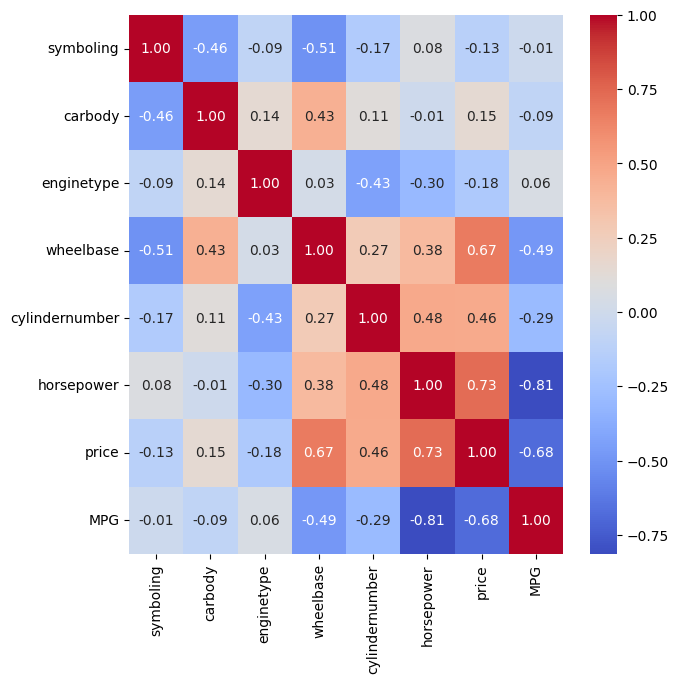

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(x.corr(), cmap = "coolwarm", annot=True,fmt=".2f" )

In [ ]:
x = x.drop("MPG", axis = 1 )

#### _Discretización de datos_

In [ ]:
x.price = x.price.astype(int)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       190 non-null    int64  
 1   carbody         190 non-null    int64  
 2   enginetype      190 non-null    int64  
 3   wheelbase       190 non-null    float64
 4   cylindernumber  190 non-null    int64  
 5   horsepower      190 non-null    int64  
 6   price           190 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.9 KB


#### _Normalización de datos_

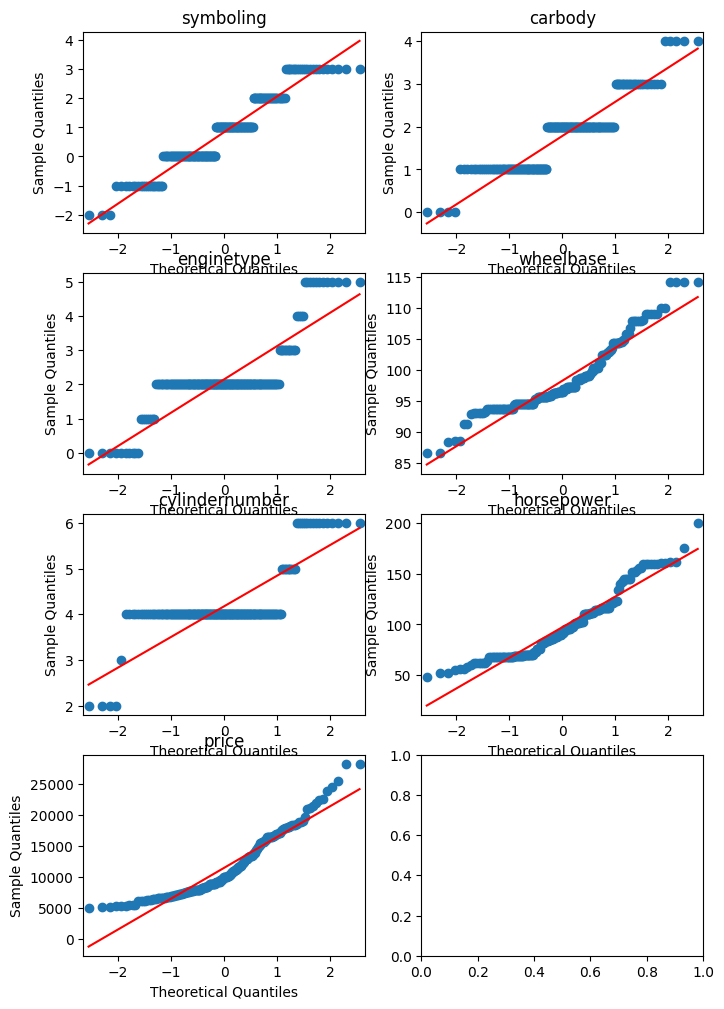

In [ ]:
figure, axis = plt.subplots(4, 2, figsize=(8, 12))

row = 0
col = 0
for i in x.columns:
  sm.qqplot(ax=axis[row, col%2], data=x[i], line = 's')
  axis[row, col%2].set_title(i)
  col =col + 1
  if col%2 == 0: row = row + 1


En los QQPlots se puede observar como las variables continuas no tienen una distribución normal al no ajustarse completamente a la recta. Como tal estas tres variables están sesgadas hacia la derecha, por lo que se aplicaría una normalización con el método Yeo Johnson para que posteriormente se puedan aplicar las herramientas estadísticas correctamente.

NOTA: Posteriormente, al realizar el modelo de regresión lineal multiple, se observó que los estadísticos de prueba mejoran al no ser normalizados, por lo que esta parte se ve omitida en el reporte final.

In [ ]:
from scipy import stats

'''fig, ax = plt.subplots(3, 1, figsize=(6, 10))

x.wheelbase, lmbda = stats.yeojohnson(x.wheelbase)
prob = stats.probplot(x.wheelbase, dist=stats.norm, plot=ax[0])
ax[0].set_title('Wheelbase')

x.horsepower, lmbda = stats.yeojohnson(x.horsepower)
prob = stats.probplot(x.horsepower, dist=stats.norm, plot=ax[1])
ax[1].set_title('Horsepower')'''

x.price, lmbda = stats.yeojohnson(x.price)
'''prob = stats.probplot(x.price, dist=stats.norm, plot=ax[2])
ax[2].set_title('Price')

fig.suptitle("Variables cualitativas despues de transformacion Box-Cox")
plt.show()'''


'prob = stats.probplot(x.price, dist=stats.norm, plot=ax[2])\nax[2].set_title(\'Price\')\n\nfig.suptitle("Variables cualitativas despues de transformacion Box-Cox")\nplt.show()'

# _ANALISIS DE LOS DATOS Y PREGUNTA BASE_

##**1. Herramientas estadísticas**

Para responder las preguntas que tiene la empresa, se decidió realizar un análisis ANOVA para las diferentes variables categóricas que se escogieron en el modelo. El objetivo de esto es poder identificar si las diferentes categorías dentro de cada variable son estadísticamente diferentes entre sí con respecto al precio en los autos, y así poder saber cuáles de estas variables ayudan a describir la diferencia de precios de los autos.

Posterior a esto, se realizará una regresión lineal múltiple con las variables escogidas. Esta regresión se hará tanto con variables categóricas como numéricas y la meta es poder tener un modelo que ayude a describir el modelo y posteriormente evaluar qué tan bien lo hace.

### ANOVA

#### Hipótesis

$H_0:$ No hay diferencia significativa en el precio de los carros dependiendo de las categorías de la variable*

$H_1:$ Hay una diferencia significativa en el precio de los carros dependiendo de las categorías de la variable*

_*entiéndase como variable a cualquiera de las variables categóricas escogidas._


#### Regla de decisión
Se utilizará un $ \alpha = 0.05 $
El valor P debe ser menor a $ \alpha $ para rechazar la hipótesis nula.

####Desarrrollo

In [ ]:
anova_fp = pd.DataFrame(index=["carbody", "enginetype", "cylindernumber", "symboling"], columns = ["f1-Score", "p-value"])

In [ ]:
anova_fp["f1-Score"]["carbody"] , anova_fp["p-value"]["carbody"] = stats.f_oneway(
    x[x['carbody'] == 0]['price'],
    x[x['carbody'] == 1]['price'],
    x[x['carbody'] == 2]['price'],
    x[x['carbody'] == 3]['price'],
    x[x['carbody'] == 4]['price'])

In [ ]:
anova_fp["f1-Score"]["enginetype"] , anova_fp["p-value"]["enginetype"] = stats.f_oneway(
    x[x['enginetype'] == 0]['price'],
    x[x['enginetype'] == 1]['price'],
    x[x['enginetype'] == 2]['price'],
    x[x['enginetype'] == 3]['price'],
    x[x['enginetype'] == 4]['price'],
    x[x['enginetype'] == 5]['price'])

In [ ]:
x.groupby("cylindernumber")["cylindernumber"].count()

cylindernumber
2      4
3      1
4    159
5     10
6     16
Name: cylindernumber, dtype: int64

In [ ]:
anova_fp["f1-Score"]["cylindernumber"] , anova_fp["p-value"]["cylindernumber"] = stats.f_oneway(
    x[x['cylindernumber'] == 4]['price'],
    x[x['cylindernumber'] == 6]['price'],
    x[x['cylindernumber'] == 5]['price'],
    x[x['cylindernumber'] == 3]['price'],
    x[x['cylindernumber'] == 2]['price'])

In [ ]:
anova_fp["f1-Score"]["symboling"] , anova_fp["p-value"]["symboling"] = stats.f_oneway(
    x[x['symboling'] == -2]['price'],
    x[x['symboling'] == -1]['price'],
    x[x['symboling'] == 0]['price'],
    x[x['symboling'] == 1]['price'],
    x[x['symboling'] == 2]['price'],
    x[x['symboling'] == 3]['price'])

In [ ]:
anova_fp

,f1-Score,p-value
carbody,3.588936,0.007621
enginetype,6.920807,0.000006
cylindernumber,20.404311,0.0
symboling,14.07139,0.0


In [ ]:
anova_fp['p-value']['symboling']

1.1864254301278804e-11

#### Conclusión
Con la siguiente tabla resumen, es posible rechazar la hipótesis nula para todas las variables categóricas escogidas, ya que todos los p-valores son bastante menores al alpha de 0.05, excepto con la variable _carbody_, la cual está un poco más cerca del 0.05. Esto significa que, para cada variable, las medias por categoría del precio de los carros son estadísticamente diferentes entre sí. Teniendo a la variable de _carbody_ como la que muestra una menor diferencia entre las medias de sus categorías, a diferencia del resto de las variables.

### Regresión lineal múltiple

En primer lugar, se separa la variable dependiente de las independientes, además de que se agrega una constante con ayuda de la librería statsmodel, ya que posteriormente aquí se guardará el valor que intercepta con el eje y.

In [ ]:
y = x['price']
X = x.drop(["price"], axis = 1)
X = sm.add_constant(X)  # Add a constant (intercept) term

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

         Variable         VIF
0           const  632.995129
1       symboling    1.696254
2         carbody    1.397600
3      enginetype    1.331955
4       wheelbase    1.953504
5  cylindernumber    1.607348
6      horsepower    1.721094


Finalmente, se puede obtener un modelo con las variable escogidas, el cual tiene una r cuadrada ajustada del 0.755, lo cual es bastante aceptable para un modelo de regresión. Asimismo, el valor del MAPE es de 16.32% lo que, según la tabla de interpretación, es un buen modelo para predecir el precio de los carros. No obstante, es importante observar que dos p-valores, específicamente de las variables carbody y engine type son mayores al alpha, por lo que se observa que la calidad del modelo no es del todo buena, a pesar de la buena calificación dada por la r cuadrada.

In [ ]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           9.67e-56
Time:                        00:56:17   Log-Likelihood:                 789.92
No. Observations:                 190   AIC:                            -1566.
Df Residuals:                     183   BIC:                            -1543.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2212      0.007    315.435      0.000       2.207       2.235
symboling          0.0007      0.000      2.455      0.015       0.000       0.001
carbody           -0.0001      0.000     -0.280      0.780      -0.001       0.001
enginetype     -8.243e-05      0.000     -0.248      0.804      -0.001       0.001
wheelbase          0.0008   7.43e-05     10.583      0.000       0.001       0.001
cylindernumber     0.0002      0.001      0.367      0.714      -0.001       0.001
horsepower         0.0001   1.22e-05     11.841      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.625   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.428
Skew:                           0.211   Prob(JB):                        0.490
Kurtosis:                       3.043   Cond. No.                     3.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn import metrics
y_pred = model.predict(X)

print ("MAPE: ", metrics.mean_absolute_percentage_error(y, y_pred))

MAPE:  0.001325833384543924


In [ ]:
## Evaluación de los supuestos para la regresión

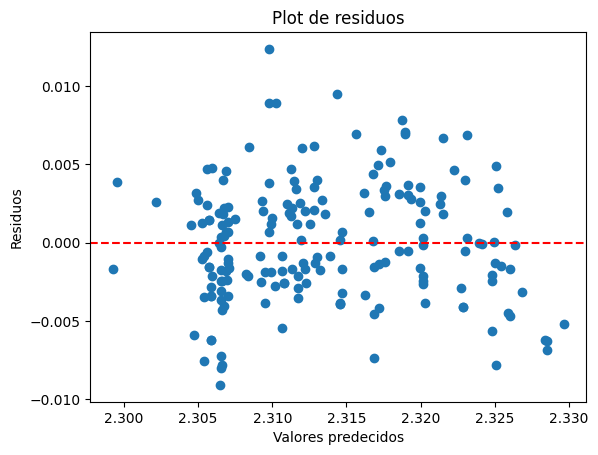

In [ ]:
res = y- y_pred

# residual plot
plt.scatter(y_pred, res)
plt.xlabel("Valores predecidos")
plt.ylabel("Residuos")
plt.title("Plot de residuos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

##**2. Gráficas del modelo**

Se puede observar a continuación una gráfica que compara los valores reales vs. los predecidos, la cual se observa como una línea recta. Esto muestra que la cercanía de los precios calculados es bastante cercana a la real

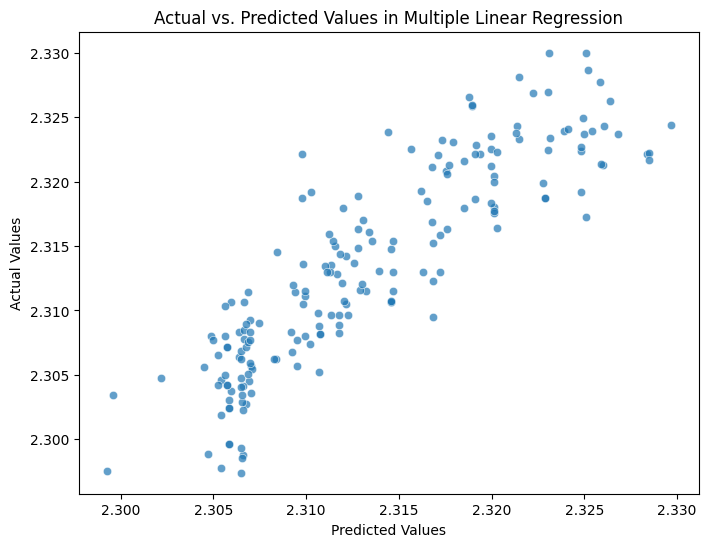

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y, alpha=0.7)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs. Predicted Values in Multiple Linear Regression")
plt.show()